In [289]:
import pandas as pd
import numpy as np
import statsmodels.stats as ss
import requests
from urllib.parse import urlencode
import json
import pingouin as pg
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
import plotly.graph_objs as go
from tqdm.auto import tqdm
import seaborn as sns

from matplotlib.pyplot import figure

sns.set(
    rc={'figure.figsize':(20,7)}
)

In [296]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/L8HxRYDn2l4h9A'  # Ссылка на яндекс диск

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Получаем dataframe
users_test = pd.read_csv(download_url, sep=';')

In [297]:
users_test.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0


In [298]:
users_test.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [299]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/TxOD_JxnkMd4mA'  # Ссылка на яндекс диск

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Получаем dataframe
users_control_1 = pd.read_csv(download_url, sep=';')

In [300]:
users_control_1.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,NaN,NaN,0
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0


In [301]:
users_control_1.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [302]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/YT6OWRK2cTWfLg'  # Ссылка на яндекс диск

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Получаем dataframe
users_control_2 = pd.read_csv(download_url, sep=';')

In [303]:
users_control_2.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0


In [304]:
users_control_2.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
dtype: object

In [305]:
users_control_2.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892035504,37,137,NaN,Israel,"1,2,3,4,5,6,7,8,9,11,13",1,30,40,51,NaN,NaN,0
1,891782112,57,0,NaN,Italy,1,1,54,60,0,NaN,NaN,0
2,891110337,30,769,NaN,France,"1,2,3,4,5",1,27,33,13,NaN,NaN,0
3,891796320,48,750,NaN,France,"1,4,6,8,10,11,12,14,15,16,18",1,45,51,12,NaN,NaN,0
4,891880212,54,638,NaN,United States of America,1,1,35,53,94,NaN,NaN,0


In [306]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/3viYBnm7cyihkQ'  # Ссылка на яндекс диск

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Получаем dataframe
transactions_test = pd.read_csv(download_url, sep=';', parse_dates=['joined_at', 'paid_at'])

In [307]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/84jzzJeQ4tqVyg'  # Ссылка на яндекс диск

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Получаем dataframe
transactions_control_1 = pd.read_csv(download_url, sep=';', parse_dates=['joined_at', 'paid_at'])

In [308]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/_pOo7mrDCZZMyA'  # Ссылка на яндекс диск

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

# Получаем dataframe
transactions_control_2 = pd.read_csv(download_url, sep=';', parse_dates=['joined_at', 'paid_at'])

In [309]:
users_test['group'] = 'A'
users_control_1['group'] = 'B'
users_control_2['group'] = 'C'

In [310]:
df_users = pd.concat([users_test, users_control_1, users_control_2], sort=False).reset_index().drop('index', axis=1)
df_users

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0,A
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0,A
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0,A
3,892130292,32,0,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,NaN,NaN,0,A
4,891406035,27,1000,NaN,France,NaN,1,24,30,1,1.0,NaN,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12907,891937401,63,242,NaN,Italy,"1,2",1,50,66,33,NaN,NaN,0,C
12908,891692844,35,500,NaN,France,"1,2,3,4,5,6,8,9,10,11,12,14,16",1,24,45,2,NaN,NaN,0,C
12909,891096429,41,333,NaN,United States of America,NaN,1,38,44,6,NaN,NaN,0,C
12910,891697584,48,210,NaN,United Kingdom (Great Britain),"2,3,5,7,9,10,12,14,15",1,45,51,19,NaN,NaN,0,C


In [311]:
df_users.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
group                object
dtype: object

In [312]:
df_users.coins = df_users.coins.fillna(0).astype(np.int64)
df_users.was_premium = df_users.was_premium.fillna(0).astype(np.int64)
df_users.is_premium = df_users.is_premium.fillna(0).astype(np.int64)

In [313]:
users_test.duplicated(subset='uid').sum()

0

In [314]:
users_control_1.duplicated(subset='uid').sum()

0

In [315]:
users_control_2.duplicated(subset='uid').sum()

0

In [316]:
users_test.gender.value_counts()

1    4106
0     202
Name: gender, dtype: int64

In [317]:
users_control_1.gender.value_counts()

1    4158
0     182
Name: gender, dtype: int64

In [318]:
users_control_2.gender.value_counts()

1    4069
0     195
Name: gender, dtype: int64

<AxesSubplot:>

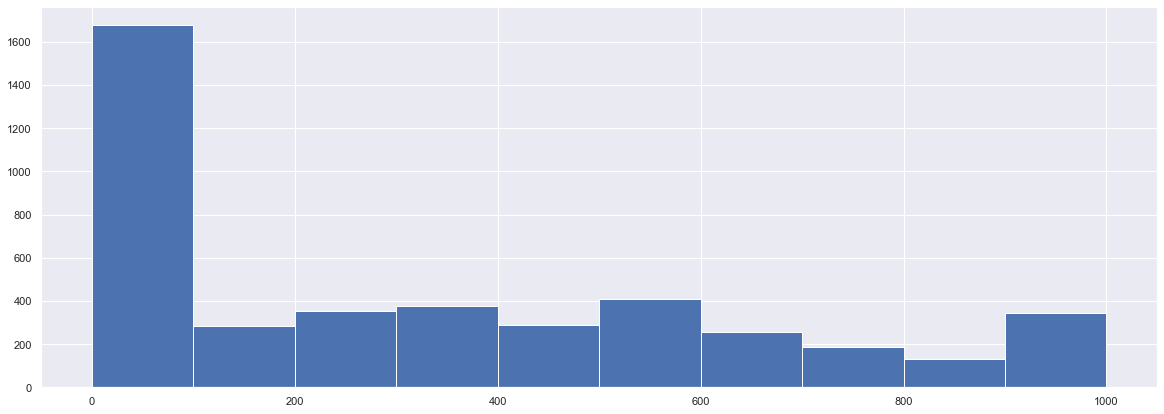

In [319]:
users_test.attraction_coeff.hist()

<AxesSubplot:>

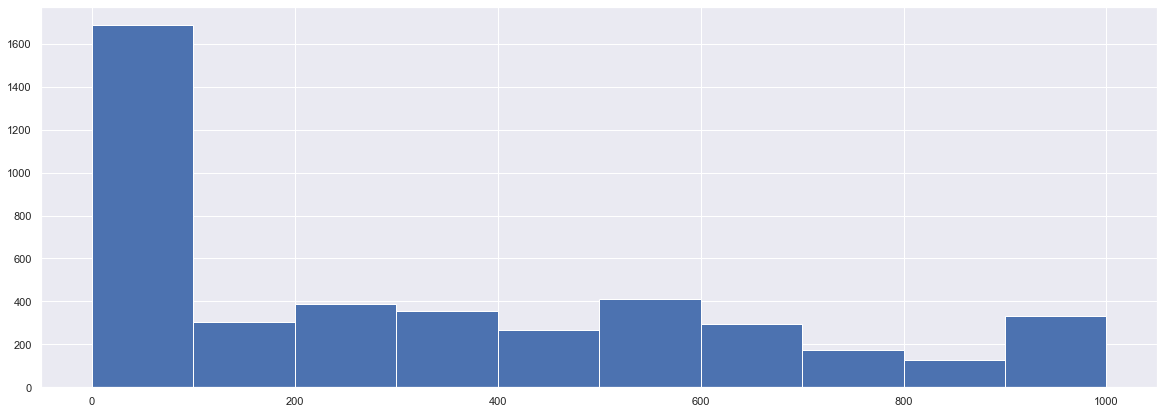

In [320]:
users_control_1.attraction_coeff.hist()

<AxesSubplot:>

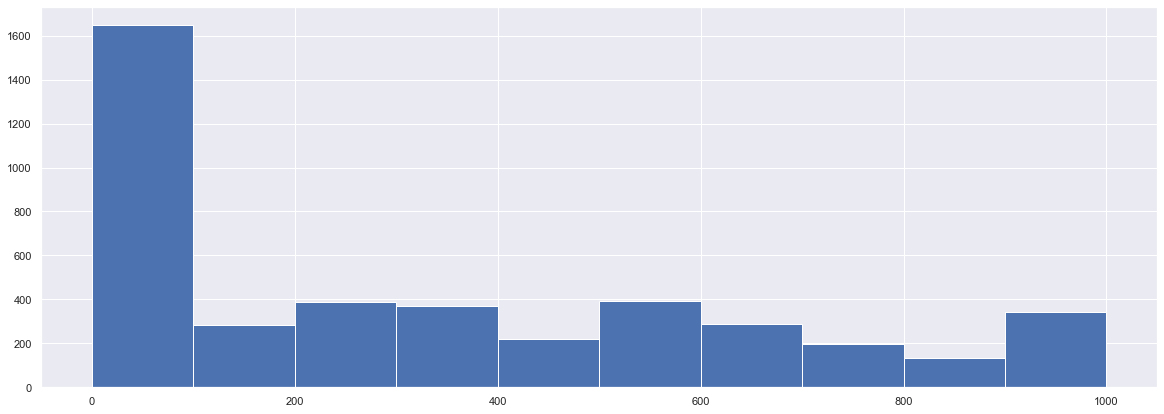

In [321]:
users_control_2.attraction_coeff.hist()

<AxesSubplot:>

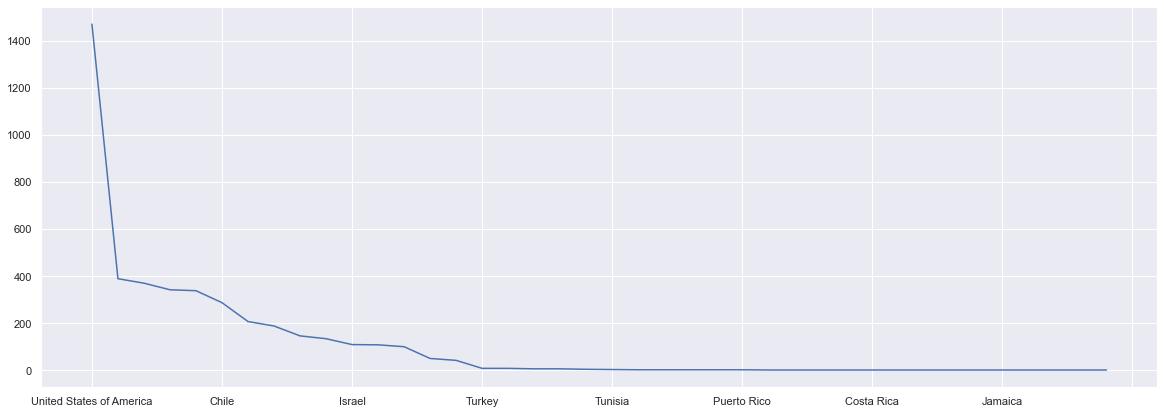

In [322]:
users_control_1.country.value_counts().plot()

<AxesSubplot:xlabel='uid', ylabel='country'>

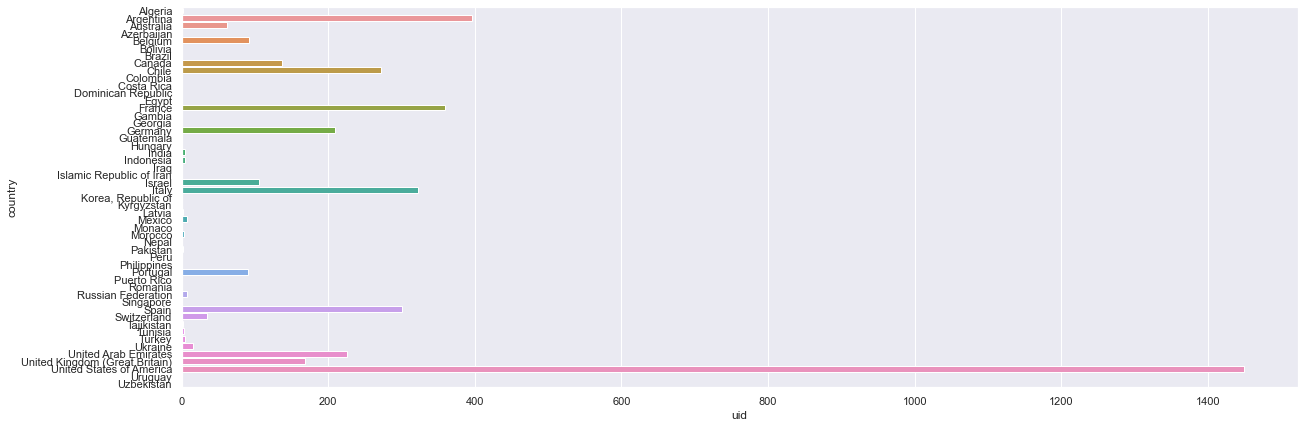

In [323]:
sns.barplot(data = users_test.groupby('country', as_index=0).agg({'uid' : 'count'}), x = 'uid', y = 'country')

<AxesSubplot:xlabel='uid', ylabel='country'>

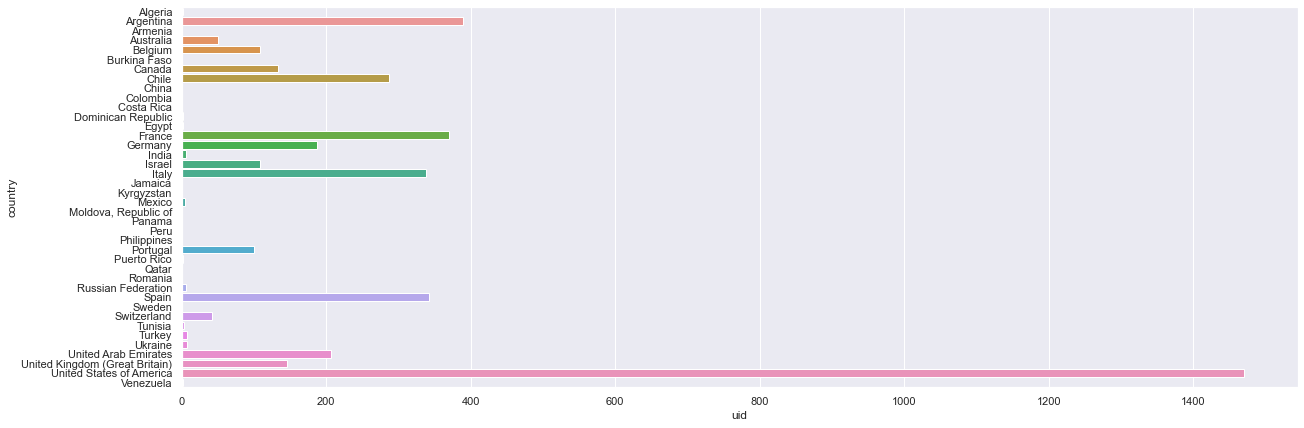

In [324]:
sns.barplot(data = users_control_1.groupby('country', as_index=0).agg({'uid' : 'count'}), x = 'uid', y = 'country')

<AxesSubplot:xlabel='uid', ylabel='country'>

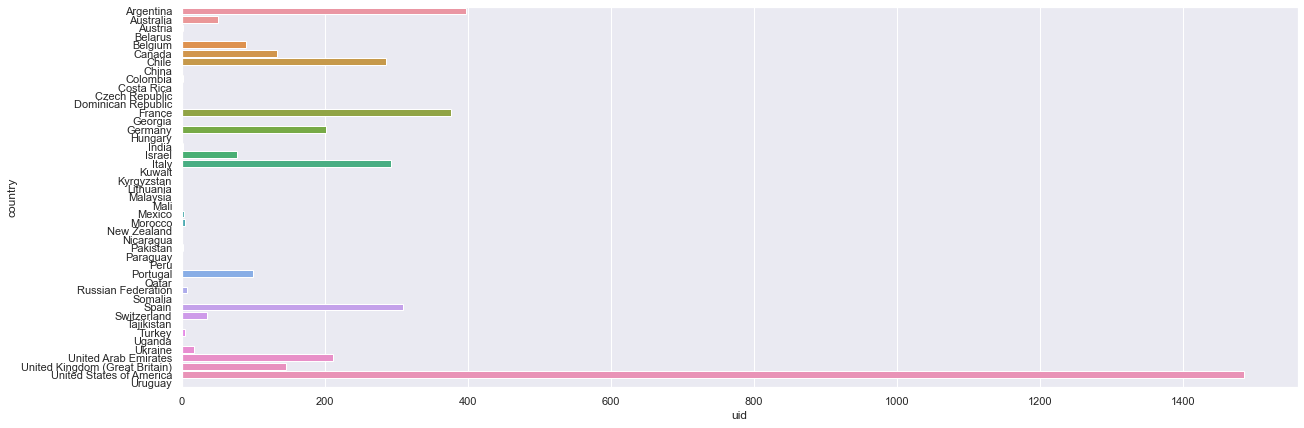

In [325]:
sns.barplot(data = users_control_2.groupby('country', as_index=0).agg({'uid' : 'count'}), x = 'uid', y = 'country')

In [326]:
users_test.shape

(4308, 14)

In [327]:
users_control_1.shape

(4340, 14)

In [328]:
users_control_2.shape

(4264, 14)

<AxesSubplot:>

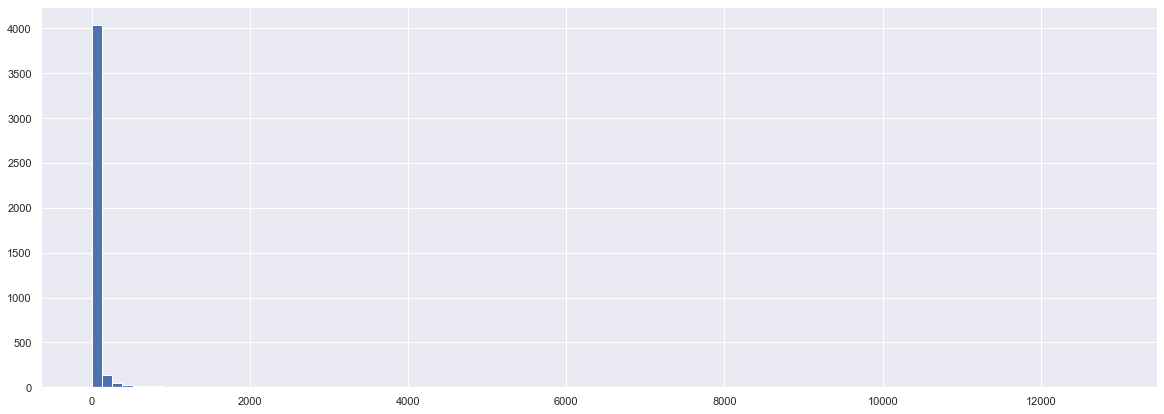

In [329]:
users_test.views_count.hist(bins=100)

<AxesSubplot:>

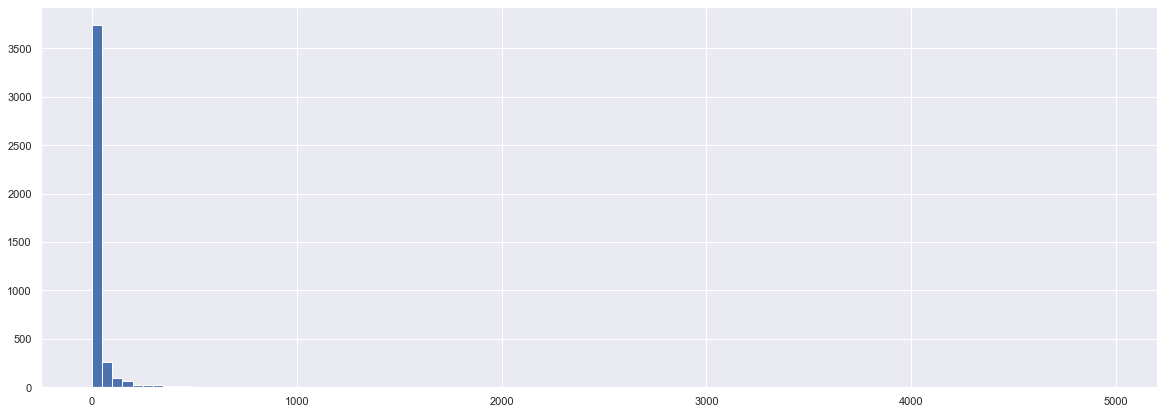

In [330]:
users_control_1.views_count.hist(bins=100)

<AxesSubplot:>

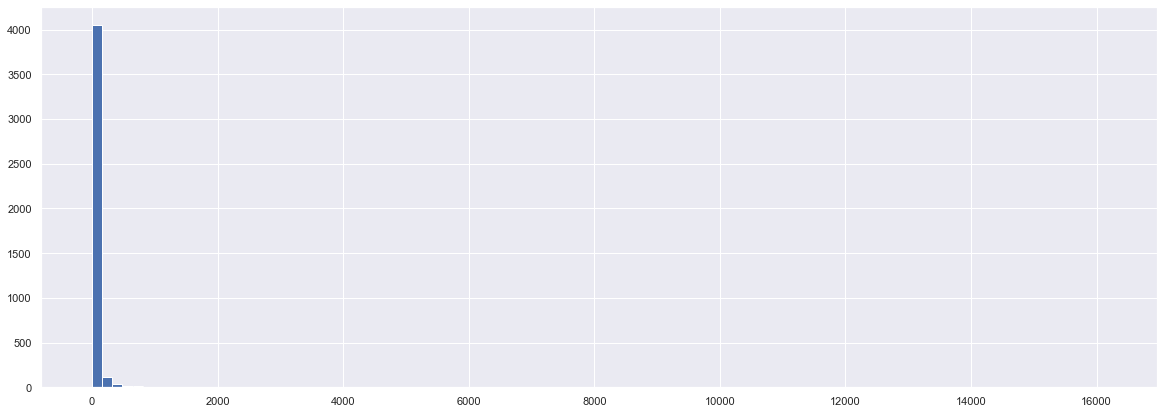

In [331]:
users_control_2.views_count.hist(bins=100)

In [332]:
users_test.was_premium.fillna(0).value_counts()

0.0    3900
1.0     408
Name: was_premium, dtype: int64

In [333]:
users_control_1.was_premium.fillna(0).value_counts()

0.0    3904
1.0     436
Name: was_premium, dtype: int64

In [334]:
users_control_2.was_premium.fillna(0).value_counts()

0.0    3853
1.0     411
Name: was_premium, dtype: int64

In [335]:
users_test.is_premium.fillna(0).value_counts()

0.0    4151
1.0     157
Name: is_premium, dtype: int64

In [336]:
users_control_1.is_premium.fillna(0).value_counts()

0.0    4148
1.0     192
Name: is_premium, dtype: int64

In [337]:
users_control_2.is_premium.fillna(0).value_counts()

0.0    4073
1.0     191
Name: is_premium, dtype: int64

<AxesSubplot:>

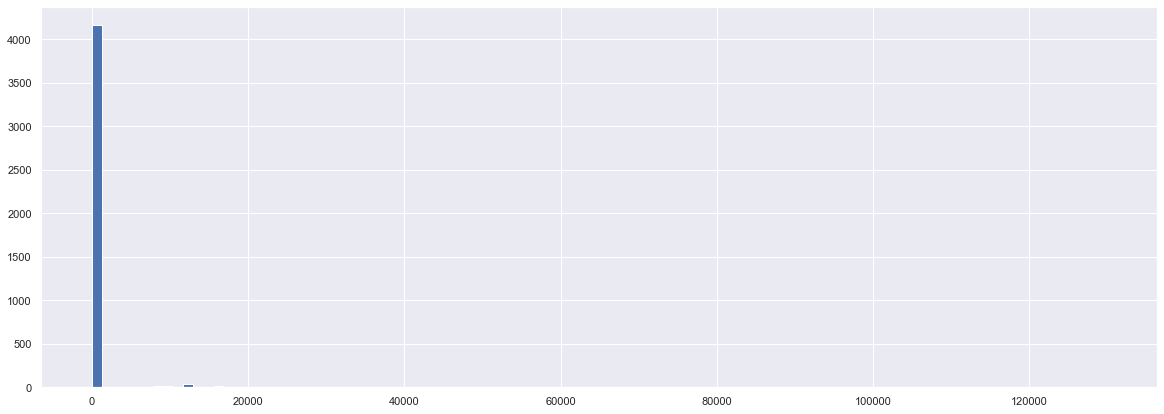

In [338]:
users_test.total_revenue.hist(bins=100)

<AxesSubplot:>

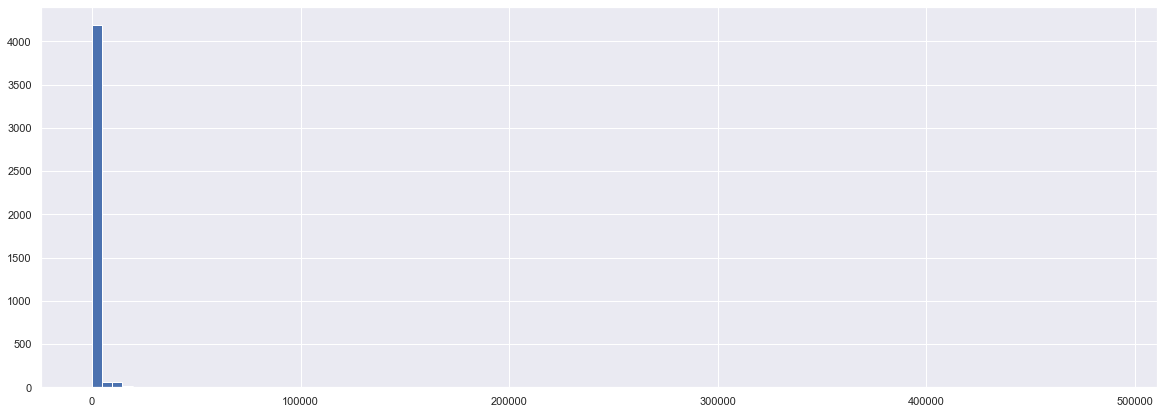

In [339]:
users_control_1.total_revenue.hist(bins=100)

<AxesSubplot:>

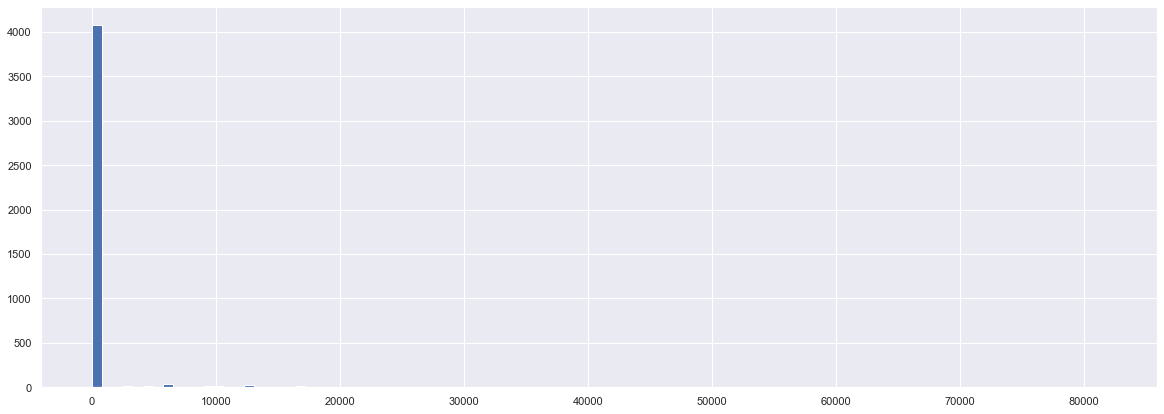

In [340]:
users_control_2.total_revenue.hist(bins=100)

In [341]:
transactions_control_1 = transactions_control_1.query("uid == uid")

In [342]:
df_transactions = pd.concat([transactions_test, transactions_control_1, transactions_control_2], sort=False).reset_index().drop('index', axis=1)
df_transactions

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891345942.0,Italy,2017-05-11 13:00:00,2017-11-13 15:04:00,12909.0,147.0,trial_vip_popup,trial_premium
1,892054251.0,United States of America,2017-10-22 00:33:00,2017-10-30 01:37:00,13923.0,147.0,trial_vip_popup,trial_premium
2,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-23 00:15:00,3783.0,67.0,menu,other_type
3,892236423.0,United States of America,2017-10-18 01:09:00,2017-10-27 22:38:00,3783.0,67.0,menu,other_type
4,892168170.0,United States of America,2017-10-19 17:10:00,2017-10-27 19:10:00,9087.0,147.0,trial_vip_popup,trial_premium
...,...,...,...,...,...,...,...,...
973,891985866.0,Belgium,2017-10-23 13:19:00,2017-10-30 15:35:00,16640.0,147.0,trial_vip_popup,trial_premium
974,891491145.0,United States of America,2017-02-11 18:13:00,2017-09-11 20:32:00,12727.0,147.0,send_message,trial_premium
975,892053750.0,United States of America,2017-10-22 00:46:00,2017-10-28 08:17:00,1261.0,19.0,autorefill,coins
976,891668253.0,Chile,2017-10-29 23:08:00,2017-11-15 00:57:00,9997.0,147.0,trial_vip_popup,trial_premium


In [343]:
df_transactions.uid = df_transactions.uid.astype(np.int64)
df_transactions.revenue = df_transactions.revenue.astype(np.int64)
df_transactions.payment_id = df_transactions.payment_id.astype(np.int64)

In [344]:
# Убираем пользователей, у которых дата покупок стоит раньше даты регистрации. Это скорее всего ошибки
df_transactions_v2 = df_transactions.query('joined_at <= paid_at')

In [345]:
df_user_transaction = df_users.merge(df_transactions_v2, how='left')

In [346]:
df_user_transaction.revenue = df_user_transaction.revenue.fillna(0)

In [348]:
df_user_transaction['isBuy'] = (df_user_transaction.revenue > 0)*1

In [349]:
# проверка на то, что в каждой группе нет одинаковых пользователей
(df_user_transaction.groupby(['uid', 'group'], as_index=0).agg({'age' : 'count'}).groupby('uid').agg({'age' : 'count'}) != 1).sum()

age    0
dtype: int64

In [356]:
# Таблица с метриками CR, ARPU и ARPAU по группам
metric_df = df_user_transaction.groupby('group', as_index=0).agg({'isBuy' : ['mean', 'sum'], 'revenue' : ['mean', 'sum']}). \
rename(columns={'isBuy': 'CR', 'rev' : 'ARPU'})
metric_df.columns = ['grp', 'CR','sum_users','ARPU', 'sum_rev']
metric_df['ARPAU'] = metric_df.sum_rev/metric_df.sum_users
metric_df = metric_df.drop(['sum_users', 'sum_rev'], axis=1)
metric_df

,grp,CR,ARPU,ARPAU
0,A,0.051294,441.023377,8598.004425
1,B,0.071667,510.012019,7116.409938
2,C,0.061215,341.100046,5572.149254


In [350]:
df_user_transaction.isnull().sum()

uid                     0
age                     0
attraction_coeff        0
coins                   0
country                 0
visit_days           4020
gender                  0
age_filter_start        0
age_filter_end          0
views_count             0
was_premium             0
is_premium              0
total_revenue           0
group                   0
joined_at           12461
paid_at             12461
revenue                 0
payment_id          12461
from_page           12461
product_type        12461
isBuy                   0
dtype: int64

In [351]:
pg.kruskal(data=df_user_transaction, dv='revenue', between='group')

,Source,ddof1,H,p-unc
Kruskal,group,2,15.551009,0.00042


In [352]:
pg.mwu(df_user_transaction.query('group == "A"').revenue, df_user_transaction.query('group == "B"').revenue)

,U-val,alternative,p-val,RBC,CLES
MWU,9700251.0,two-sided,0.000089,0.019987,0.490007


In [357]:
pg.kruskal(data=df_user_transaction.query('revenue > 0'), dv='revenue', between='group')

,Source,ddof1,H,p-unc
Kruskal,group,2,17.112824,0.000192


In [358]:
pg.mwu(df_user_transaction.query('revenue > 0').query('group == "A"').revenue, 
       df_user_transaction.query('revenue > 0').query('group == "B"').revenue)

,U-val,alternative,p-val,RBC,CLES
MWU,40215.0,two-sided,0.035736,-0.105233,0.552616


In [359]:
pg.mwu(df_user_transaction.query('revenue > 0').query('group == "A"').revenue, 
       df_user_transaction.query('revenue > 0').query('group == "C"').revenue)

,U-val,alternative,p-val,RBC,CLES
MWU,36645.0,two-sided,0.000056,-0.210045,0.605022


In [360]:
pg.mwu(df_user_transaction.query('revenue > 0').query('group == "B"').revenue, 
       df_user_transaction.query('revenue > 0').query('group == "C"').revenue)

,U-val,alternative,p-val,RBC,CLES
MWU,48182.0,two-sided,0.014406,-0.116668,0.558334


In [370]:
expected, observed, stats = pg.chi2_independence(df_user_transaction, x = 'group', y = 'isBuy', correction=True)

In [371]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,16.014189,2.0,0.000333,0.034730,0.956845
1,cressie-read,0.666667,16.025198,2.0,0.000331,0.034742,0.956968
2,log-likelihood,0.000000,16.070525,2.0,0.000324,0.034791,0.957472
3,freeman-tukey,-0.500000,16.125147,2.0,0.000315,0.034850,0.958071
4,mod-log-likelihood,-1.000000,16.197725,2.0,0.000304,0.034928,0.958855
5,neyman,-2.000000,16.398022,2.0,0.000275,0.035144,0.960949


In [372]:
expected

isBuy,0,1
group,,
A,4135.208707,270.791293
B,4216.861716,276.138284
C,4108.929577,269.070423


In [373]:
observed

isBuy,0,1
group,,
A,4180,226
B,4171,322
C,4110,268
